# Assignment 2:  the perceptron

Due date:  Friday 9/21 at 11:59pm


### Prashant K Thakur


## Datasets

In this assignment we will use the following datasets:
  * The [Gisette](http://archive.ics.uci.edu/ml/datasets/Gisette) handwritten digit recognition dataset. 
  * The [QSAR](http://archive.ics.uci.edu/ml/datasets/QSAR+biodegradation) data for predicting the biochemical activity of a molecule.
  * The [Heart disease diagnosis](http://archive.ics.uci.edu/ml/datasets/Heart+Disease) dataset.
  * For developing your code, you can use one of the scikit-learn datasets, such as the [breast cancer wisconsin dataset](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer) and the [make_classification](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html#sklearn.datasets.make_classification) toy dataset generator.
  
When writing your notebook, you can assume the datasets are in the same directory as the notebook.  Please keep the same file names as in the UCI repository.
  

## Part 1:  Variants of the perceptron algorithm 

In this assignment you will work with several variants of the perceptron algorithm:

  * The "vanila" version of the perceptron algorithm, which was introduced in class.
  * The pocket algorithm as described in the slides or page 80 in the book.
  * The **adatron** version of the perceptron described next.

In each case make sure that your implementation of the classifier **includes a bias term** (in slide set 2 and page 7 in the book you will find guidance on how to add a bias term to an algorithm that is expressed without one).

## The adatron 

Before we get to the adatron, we will derive an alternative form of the perceptron algorithm --- the dual perceptron algorithm.  All we need to look at is the weight update rule:

$$\mathbf{w} \rightarrow \mathbf{w} + \eta y_i \mathbf{x}_i.$$

This is performed whenever example $i$ is misclassified by the current weight vector.  The thing to notice, is that the weight vector is always a weighted combination of the training examples since it is that way to begin with, and each update maintains that property.  So in fact, rather than representing $\mathbf{w}$ explicitly, all we need to do is to keep track of how much each training example is contributing to the value of the weight vector, i.e. we will express it as:

$$\mathbf{w} = \sum_{i=1}^N \alpha_i y_i \mathbf{x}_i,$$

where $\alpha_i$ are positive numbers that describe the magnitude of the contribution $\mathbf{x}_i$ is making to the weight vector, and $N$ is the number of training examples.

Therefore to initialize $\mathbf{w}$ to 0, we simply initialize $\alpha_i = 0$ for $i = 1,\ldots,N$.  When expressed using the variables $\alpha_i$, the perceptron update rule becomes:

$$\alpha_i = \alpha_i + \eta y_i,$$

and you can always retrieve the weight vector using its expansion in terms of the $\alpha_i$.

Now we're ready for the adatron - the only difference is in the initialization and update equation.

Initialization:

$\alpha_i = 1$ for $i = 1,\ldots,N$

Like in the perceptron we run the algorithm until convergence, or until a fixed number of epochs has passed (an epoch is a loop over all the training data), and an epoch of training consists of the following procedure:

for each training example $i=1,\ldots,N$ perform the following steps:

1.  $\gamma = y_i * \mathbf{w}^{t} \mathbf{x}_i$
2.  $\delta\alpha = \eta * (1 - \gamma)$
3.  `if` $(\alpha_i + \delta\alpha < 0)$ : $\alpha_i = 0$, `else : ` $\alpha_i = \alpha_i + \delta\alpha$


The variable $\eta$ plays the role of the learning rate $\eta$ employed in the perceptron algorithm and $\delta \alpha$ is the proposed magnitude of change in $\alpha_i$. 
We note that the adatron tries to maintain a **sparse** representation in terms of the training examples by keeping many $\alpha_i$ equal to zero.  The adatron converges to a special case of the SVM algorithm that we will learn later in the semester; this algorithm tries to maximize the margin with which each example is classified, which is captured by the variable $\gamma$ in the algorithm (notice that the magnitude of change proposed for each $\alpha_i$ becomes smaller as $\gamma$ increases towards 1).

**Note:** if you observe an overflow issues in running the adatron, add an upper bound on the value of $\alpha_i$.

Here's what you need to do:

  - Implement the pocket algorithm and the adatron; each classifier should be implemented in a separate Python class, and use the same interface used in the code provided for the perceptron algorithm, i.e. provides the same methods with the same signature.  Make sure each classifier you use (including the original version of the perceptron) implements a bias term.
  - Compare the performance of these variants of the perceptron on the Gisette and QSAR datasets by computing an estimate of the out of sample error on a sample of the data that you reserve for testing (the test set).  In each case reserve about 60% of the data for training, and 40% for testing.  To gain more confidence in our error estimates, repeat this experiment using 10 random splits of the data into training/test sets.  Report the average error and its standard deviation in a nicely formatted table.  Is there a version of the perceptron that appears to perform better?   (In answering this, consider the differences in performance you observe in comparison to the standard deviation).



In [2]:
# Perceptron class
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
class Perceptron :
 
    """An implementation of the perceptron algorithm.
    Note that this implementation does not include a bias term"""
 
    def __init__(self, max_iterations=100, learning_rate=0.2) :
 
        self.max_iterations = max_iterations
        self.learning_rate = learning_rate
 
    def fit(self, X, y) :
        """
        Train a classifier using the perceptron training algorithm.
        After training the attribute 'w' will contain the perceptron weight vector.
 
        Parameters
        ----------
 
        X : ndarray, shape (num_examples, n_features)
        Training data.
 
        y : ndarray, shape (n_examples,)
        Array of labels.
 
        """
        X = np.hstack((np.ones((X.shape[0],1)),X))
        self.w = np.zeros(len(X[0]))
        converged = False
        iterations = 0
        while (not converged and iterations <= self.max_iterations) :
            converged = True
            for i in range(len(X)) :
                if y[i] * self.decision_function(X[i]) <= 0 :
                    self.w = self.w + y[i] * self.learning_rate * X[i]
                    converged = False
            iterations += 1
        self.converged = converged
#         if converged :
#             print ('%s converged in %d iterations ' % (self.name(),iterations))
#         print ('weight vector: ' + str(self.w))
 
    def decision_function(self, x) :
        return np.inner(self.w, x)
    
    def name(self,):
        return "Perceptron"
    
    def predict(self, X) :
        """
        make predictions using a trained linear classifier
 
        Parameters
        ----------
 
        X : ndarray, shape (num_examples, n_features)
        Training data.
        """
        X = np.hstack((np.ones((X.shape[0],1)),X))
        scores = np.inner(self.w, X)
        return np.sign(scores)

# Pocket Algorithm
class PocketAlgorithm :
 
    """An implementation of the perceptron algorithm.
    Note that this implementation does not include a bias term"""
 
    def __init__(self, max_iterations=100, learning_rate=0.2) :
 
        self.max_iterations = max_iterations
        self.learning_rate = learning_rate
        self.error = list()
 
    def fit(self, X, y) :
        """
        Train a classifier using the perceptron training algorithm.
        After training the attribute 'w' will contain the perceptron weight vector.
 
        Parameters
        ----------
 
        X : ndarray, shape (num_examples, n_features)
        Training data.
 
        y : ndarray, shape (n_examples,)
        Array of labels.
 
        """
        # Add bias term.
        X = np.hstack((np.ones((X.shape[0],1)),X))
        self.w = np.zeros(len(X[0]))
        self.w_pocket = self.w
        converged = False
        iterations = 0
        prev_error = np.float('inf')
        while (not converged and iterations <= self.max_iterations) :
            converged = True
            for i in range(len(X)) :
                if y[i] * self.decision_function(X[i]) <= 0 :
                    self.w = self.w + y[i] * self.learning_rate * X[i]
                    converged = False
                    # Find E_in and update w_pocket. 
                    # Measure: number of misclassified data elements.
                    y_predict = np.sign(np.inner(self.w, X))
                    num_misclassified = np.sum(y_predict != y)/len(y)
                    if num_misclassified < prev_error:
                        #Store errors progress - Test purpose.
                        self.error.append(prev_error)
                        self.w_pocket = self.w
                        prev_error = num_misclassified
            
            iterations += 1
        self.converged = converged
#         if converged :
#             print ('%s converged in %d iterations ' % (self.name(),iterations))
#         print ('weight vector: ' + str(self.w_pocket))
#         return w_pocket

 
    def decision_function(self, x) :
        return np.inner(self.w, x)
    
    def name(self,):
        return "Pocket Alogrithm"
    
    def predict(self, X) :
        """
        make predictions using a trained linear classifier
 
        Parameters
        ----------
 
        X : ndarray, shape (num_examples, n_features)
        Training data.
        """
        X = np.hstack((np.ones((X.shape[0],1)),X))
        scores = np.inner(self.w_pocket, X)
        return np.sign(scores)




In [6]:

class Adatron:
 
    """An implementation of the perceptron algorithm.
    Note that this implementation does not include a bias term"""
 
    def __init__(self, max_iterations=100, learning_rate=0.2) :
 
        self.max_iterations = max_iterations
        self.learning_rate = learning_rate
    
    def name(self,):
        return "Adatron"
    
    def fit(self, X_orig, y) :
        """
        Train a classifier using the perceptron training algorithm.
        After training the attribute 'w' will contain the perceptron weight vector.
 
        Parameters
        ----------
 
        X : ndarray, shape (num_examples, n_features)
        Training data.
 
        y : ndarray, shape (n_examples,)
        Array of labels.
 
        """
        X = np.hstack((np.ones((X_orig.shape[0],1)),X_orig))
        self.w = np.zeros(len(X[0]))
        converged = False
        iterations = 0
        while (not converged and iterations <= self.max_iterations) :
            self.alpha = np.ones(X.shape[0])
            for i in range(len(X)) :
                self.alpha[i]+=self.learning_rate*y[i]
                gamma = y[i]* np.inner(np.transpose(self.w),X[i])
                delta_alpha = self.learning_rate*(1-gamma)
                if (self.alpha[i] + delta_alpha < 0):
                    self.alpha[i] = 0
                elif (self.alpha[i]+delta_alpha > 70):
                    self.alpha[i] = 70
                    self.w += self.alpha[i]*y[i]*X[i]

                else:
                    self.alpha[i] = self.alpha[i] + delta_alpha
                    self.w += self.alpha[i]*y[i]*X[i]
            # Check the number of mis-classified data element on original datasest
            # if the model is already able to classify all of the data correctly after full epoch training
            # (100% accuracy) stop update of weight.
            
            # This makes the code faster but it was not included as in lecture Prof discussed it should go the entire iterations.

#             if np.sum(self.predict(X_orig) != y) == 0 :
#                 converged=True
    
            iterations += 1
        self.converged = converged
#         if converged :
#             print ('%s converged in %d iterations ' % (self.name(),iterations))
#         print ('weight vector: ' + str(self.w))
 
    def decision_function(self, x) :
        return np.inner(self.w, x)
 
    def predict(self, X) :
        """
        make predictions using a trained linear classifier
 
        Parameters
        ----------
 
        X : ndarray, shape (num_examples, n_features)
        Training data.
        """
        X = np.hstack((np.ones((X.shape[0],1)),X))
        scores = np.inner(self.w, X)
        return np.sign(scores)

* Compare the performance of these variants of the perceptron on the Gisette and QSAR datasets by computing an estimate of the out of sample error on a sample of the data that you reserve for testing (the test set). In each case reserve about 60% of the data for training, and 40% for testing. To gain more confidence in our error estimates, repeat this experiment using 10 random splits of the data into training/test sets. Report the average error and its standard deviation in a nicely formatted table. Is there a version of the perceptron that appears to perform better? (In answering this, consider the differences in performance you observe in comparison to the standard deviation).

In [4]:
# Answer to part-b
# Read the data 
from sklearn.model_selection import train_test_split
import pandas as pd

def qsar_loader():
    '''
    Return X,y from dataset.
    X = features dataset.
    y = labels. convert label to 1 for positive class and -1 for negative class
    '''
    qsar_data = np.genfromtxt("biodeg.csv",delimiter=';',usecols=range(41))
    label = np.genfromtxt("biodeg.csv",delimiter=';',usecols=[41],dtype='str')
    return qsar_data,np.where(label == 'RB',1,-1)

def gisette_loader():
    '''
    Return X,y from dataset.
    X = features dataset 
    y = labels. convert label to 1 for positive class and -1 for negative class
    '''
    data = np.genfromtxt("gisette_train.data",delimiter=' ')
    label = np.genfromtxt("gisette_train.labels")
    return data,label

def heart_loader():
    data = np.genfromtxt("processed.cleveland.data", delimiter=",")
#     df = pd.DataFrame(data)
#     df = df.dropna()
#     data = np.array(df)
    data = data[~np.isnan(data).any(axis=1)]
    heart_data = data[:,:-1]
    label = np.where(data[:,-1] == 0,-1,1) # if 0 label as -1 else 1 for everything else (1,2,3)-some heart problem.
    return heart_data, label
    

In [5]:
# Import library to divide the dataset into 60-40.
from sklearn.model_selection import train_test_split
# Add all prediction while running 10 times for each class on different dataset.
info = dict()
for cls, cls_name in [(Perceptron,"perceptron"), (PocketAlgorithm,"pocket"), (Adatron,"adatron")]:
    for func in [qsar_loader, gisette_loader]:
#         print("Using dataset: %s"%func.__name__)
        info['%s-%s'%(cls_name,func.__name__.split('_')[0])] = []
        # Read dataset using dataset reader function.
        X,y = func()
        # Iterate ten times to train and test different classifier for different dataset.
        for i in range(10): 
            #if added random_state than same partition of the data is generated every time.
            X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.40)
            obj = cls(max_iterations=100)
            obj.fit(X_train,y_train)
            predicted =obj.predict(X_test)
            num_misclassified = np.sum(predicted != y_test)
            info['%s-%s'%(cls_name,func.__name__.split("_")[0])].append(num_misclassified/len(y_test))


In [7]:
# Find mean and standard deviation and print in table format.
print("-------------------------------------------------------------------")
print("Algorithm-Dataset","\t","Mean(Error)","\t","Standard Deviation (Error)")
print("-------------------------------------------------------------------")
classifier=["pocket","perceptron","adatron"]
data_name=["qsar","gisette"]
for d_name in data_name:
    for cls in classifier:
        key = '%s-%s'%(cls,d_name)
        value = np.array(info[key])
        if ("pocket" in key or "adatron" in key) and (not "adatron-gisette" in key):
            print("{:<25}{:<20.4f}{:<0.4f}".format(key,value.mean(),value.std()))
        else:
            print("{:<25}{:<20.4f}{:<0.4f}".format(key,value.mean(),value.std()))
    print("......................................................")
   

-------------------------------------------------------------------
Algorithm-Dataset 	 Mean(Error) 	 Standard Deviation (Error)
-------------------------------------------------------------------
pocket-qsar              0.1559              0.0136
perceptron-qsar          0.2246              0.0455
adatron-qsar             0.1919              0.0557
......................................................
pocket-gisette           0.0317              0.0032
perceptron-gisette       0.0329              0.0030
adatron-gisette          0.0334              0.0039
......................................................


#### Answer: 
The function to read the code is added (above): qsar_loader - reads QSAR dataset; gisette_loader - reads gisette dataset; and heart_loader - reads processed.cleveland dataset. 

In order to divide the dataset into 60%-40%, a sklearn library is used which divides the dataset into given proportion by shuffling the dataset everytime so that it gives different results for each execution. The dataset is divided 10 times and the 60% of the data is used for training all three classifiers (Perceptron, Pocket Algorithm, Adatron). When we run the classifiers 10 times, we take the mean error and the standard deviation of the errors and displayed in the tabular format (above).

The mean error is better of "Pocket Algorithm" in all three dataset. For Gisette dataset, the Adatron has slightly better performance on all 3 dataset than Perceptron (most of the time). The performance of "Pocket Alogrithm" is considerably better as we are storing the best weight vector that was seen during the entire classification process. Therefore, Pocket Algorithm is so far better at stroing the best value of weights.

When we check the standard deviation of the error distribution is lower for Pocket Algorithm in all three dataset. It signifies that the error generated during the classification was very close (in value) to each other because of which the standard deviation was small. As the Pocket Algorithm stores the best weight vector, it is likely that the error rate was similar in all 10 repeatition. The variation on the error generated for different repeatition is higher for adatron and perceptron classifier. Suppose the best weight vector was on iteration 10 but for Perceptron and Adatron the weight vector is updated for other iterations as well which might lead to imbalanced error during the classification which could be one reason of different error rate on different repeatition.

Moreover, the classifier converges on gisette dataset so the mean error and standard deviation are closer to each other. In most of repeatition, pocket algorithm has lower standard deviation.

## Part 2:  Learning Curves 

Whenever we train a classifier it is useful to know if we have collected a sufficient amount of data for accurate classification.  A good way of determining that is to construct a **learning curve**, which is a plot of classifier performance (i.e. its error) as a function of the number of training examples.  Plot a learning curve for the perceptron algorithm (with bias) using the Gisette dataset.  The x-axis for the plot (number of training examples) should be on a logarithmic scale - something like 10,20,40,80,200,400,800.  Use numbers that are appropriate for the dataset at hand, choosing values that illustrate the variation that you observe.  What can you conclude from the learning curve you have constructed?  Make sure that you use a fixed test set to evaluate performance while varying the size of the training set.

In [658]:
# Load gisette dataset for learning curve
X, y = gisette_loader()

In [661]:
x_axis= []
y_axis = []
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)
# Increment the dataset size by 100
for idx in range(1,len(X_train),100):
    model = Perceptron()
    model.fit(X_train[:idx],y_train[:idx])
    # Predict on test sample to compute out sample error (E_out)
    predicted = model.predict(X_test)
    # Prepare data for plot.
    x_axis.append(idx)
    y_axis.append(np.sum(predicted != y_test)/len(y_test))


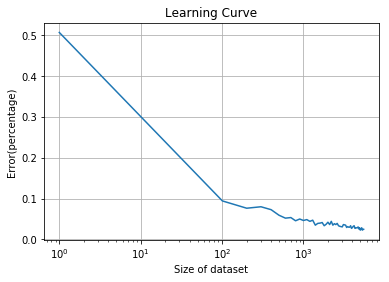

In [662]:
import matplotlib.pyplot as plt
plt.semilogx(x_axis, y_axis)
plt.title('Learning Curve')
plt.xlabel("Size of dataset")
plt.ylabel("Error(percentage)")
plt.grid(True)

#### Answer:
As the number of dataset increases the error generated by the classifier on unseen dataset decreases. As seen in the graph above, when the model was trained with lower number of dataset, the error for classifier is very high (slightly above 0.5) but the error gradually decreases as the number of training dataset increases. Thus, we can say by increasing the training dataset the classifier performs better on unseen (testing dataset) i.e lower out sample error ($E_{out}$)

Note: Since the sample size is 1 and 100, the initial line is straight line as there are only two sample in that range.

## Part 3:  Data normalization 

In this section we will explore the effect of normalizing the data, focusing on normalization of features.  The simplest form of normalization is to scale each feature to be in the range [-1, 1].  We'll call this **scaling**.

Here's what you need to do:

  - Explain how to scale the data to be in the range [-1, 1].
  - Compare the accuracy of the perceptron with bias on the original data and the scaled version of the heart dataset.  Does one of them lead to better performance?  Explain why you think this happens.  
  - An alternative way of normalizing the data is to **standardize** it:  for each feature subtract the mean and divide by its standard deviation.  What can you say about the range of the resulting features in this case?  




In [671]:
def normalizer(X):
    X = X[:,1:]
    X_max = X.max(axis=0)
    X_min = X.min(axis=0)
    norm_X = 2*((X - X_min)/(X_max - X_min))-1 # For [-1,1]
#     norm_X = (X - X_min)/(X_max - X_min) # For [0,1]
    return norm_X

def standardize(X):
    means = X.mean(axis=0)
    stds = X.std(axis=0)
    return (X - means) / stds

X,y = heart_loader()
norm_X = normalizer(X)
stand_X = standardize(X)
X_train, X_test, y_train, y_test = train_test_split(norm_X,y,test_size=0.40)

# Testing library for normalization to check error with custom normalizer.
# from sklearn import preprocessing
# max_abs_scaler = preprocessing.MaxAbsScaler()
# X_train_maxabs = max_abs_scaler.fit_transform(X_train)
# X_test_maxabs = max_abs_scaler.transform(X_test)
# p = Perceptron()
# p.fit(X_train_maxabs,y_train)
# predicted = p.predict(X_test_maxabs)

p = Perceptron()
p.fit(X_train,y_train)
predicted = p.predict(X_test)
print("Error WITH NORMALIZED data: ",np.sum(predicted == y_test)/len(y_test))

X_train, X_test, y_train, y_test = train_test_split(stand_X,y,test_size=0.40)
p = Perceptron()
p.fit(X_train,y_train)
predicted = p.predict(X_test)
print("Error WITH STANDARIZED data: ",np.sum(predicted == y_test)/len(y_test))

p1=Perceptron()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.40)
p1.fit(X_train,y_train)
predicted = p1.predict(X_test)
print("Error WITH ORIGINAL data: ",np.sum(predicted == y_test)/len(y_test))


Error WITH NORMALIZED data:  0.8319327731092437
Error WITH STANDARIZED data:  0.773109243697479
Error WITH ORIGINAL data:  0.5630252100840336


#### Answer
* In order to scale the data feature between \[-1,1\] we use the following formula:
$$
\bar{X}= 2*\frac{X - min(X)}{max(X) - min(X)}-1
$$

Let us verify the steps. As we can see below after normalization the maximum and minimum value of the normalized value is 1 and -1 respectively. While in the original dataset the maximum value was 564 and minimum value was 0.

In [697]:
X,y = heart_loader()
print(X.max(),X.min())
norm_X = normalizer(X)
# Check entire dataset for maximum and minimum value.
print(norm_X.max(),norm_X.min())

564.0 0.0
1.0 -1.0


* After testing the classifier multiple times, we see the accuracy of the classifier is $\underline{higher}$ for $\underline{normalized}$ dataset. Suppose there is an outlier in the dataset on one feature, then the feature prediction would highly depend on the outlier. All the feature vectors are normalized and the value of all the features are within \[-1,1\] because of which every feature has similar importance and the algorithm can properly train on a normalized dataset and learn the important features out of many features. Since the prediction depend on the weight vector and the data value (suppose n is total number of features):

$$
prediction = w_1x_1 + w_2x_2 + w_3x_3 + ... + w_nx_n
$$

* We can see in above equation if the value of x is very high than it would have higher effect on the prediction and it might mask other features importance. Let us borrow an example from our heart disease dataset so the weight (say w_1) for a feature with lower value (gender-0,1) should be very high to balance the effect of higher value in another feature (say blood pressure-120). Hence, normalization removes this problem and performs better eventhough the outliers are present in the dataset.

##### Standarization of dataset.
When we use the standarization method, we make the feature to be normally distributed where the data is distributed across the mean. After the feature vector is standarized, the value still doesn't bound to some specific range as in normalization. The value may be different with different higher value and lower value for different features in the dataset (i.e there is no specific range for the values). Also, the effect of outliers can still be present in the data even after standarization as the value is not scaled in some range and the affect might be moderate but it still exists.


In [699]:
X,y = heart_loader()
print(X.max(),X.min())
std_X = standardize(X)
print(std_X.max(),std_X.min())

564.0 0.0
6.0999809349091 -3.431849303654339


### Grading 

Here is what the grade sheet will look like for this assignment.  A few general guidelines for this and future assignments in the course:

  * Your answers should be concise and to the point.  We will take off points if that is not the case.
  * Always provide a description of the method you used to produce a given result in sufficient detail such that the reader can reproduce your results on the basis of the description.  You can use a few lines of python code or pseudo-code.


Grading sheet for the assignment:

```
Part 1:  60 points.
(30 points):  Correct implementation of the classifiers
(15 points):  Good protocol for evaluating classifier accuracy; results are provided in a clear and concise way
(15 points):  Discussion of the results

Part 2:  20 points.
(15 points):  Learning curves are correctly generated and displayed in a clear and readable way
( 5 points):  Discussion of the results

Part 3:  20 points.
( 5 points):  How to perform data scaling
(10 points):  Comparison of normalized/raw data results; discussion of results
( 5 points):  Range of features after standardization
```


Grading will be based on the following criteria:

  * Correctness of answers to math problems
  * Math is formatted as LaTex equations
  * Correct behavior of the required code
  * Easy to understand plots 
  * Overall readability and organization of the notebook
  * Effort in making interesting observations where requested.
  * Conciseness.  Points may be taken off if the notebook is overly 
  